## Import data set 

In [8]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# set seaborn theme
sns.set_theme()

# Step 1: Load the data
data = pd.read_excel("StatsCourse.xlsx")

# display the first few rows to understand the data structure
data.head()

,Gender,Books,Attendance,Percentage Grade,Final Grade
0,w,0,9,45,FX
1,w,1,15,57,E
2,w,0,10,45,FX
3,w,2,16,51,E
4,w,4,10,65,D


## Descriptives for categorical variables


In [9]:
# absolute frequencies
print(data.Gender.value_counts(),'\n')
print(data['Final Grade'].value_counts())

Gender
m    30
w    10
Name: count, dtype: int64 

Final Grade
E     10
D     10
FX     8
B      6
A      3
C      2
F      1
Name: count, dtype: int64


In [10]:
# relative frequencies
print(data.Gender.value_counts(normalize=True),'\n')
print(data['Final Grade'].value_counts(normalize=True))

Gender
m    0.75
w    0.25
Name: proportion, dtype: float64 

Final Grade
E     0.250
D     0.250
FX    0.200
B     0.150
A     0.075
C     0.050
F     0.025
Name: proportion, dtype: float64


### Bar Chart
Simple bar chart of gender drawn using Pandas (without Seaborn).

First, determine absolute frequencies, then plot.

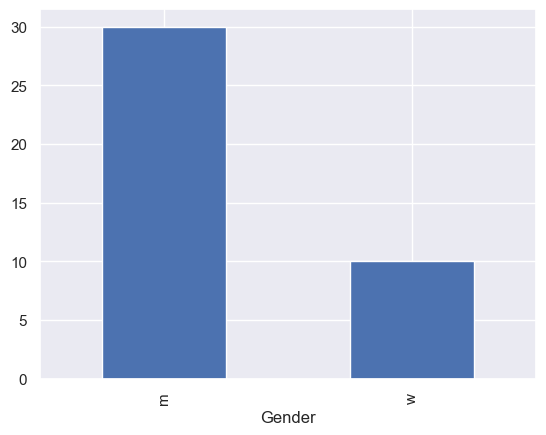

In [11]:
data.Gender.value_counts().plot.bar()
None

Two bar charts in one figure, created with Seaborn and a specific order for the grades

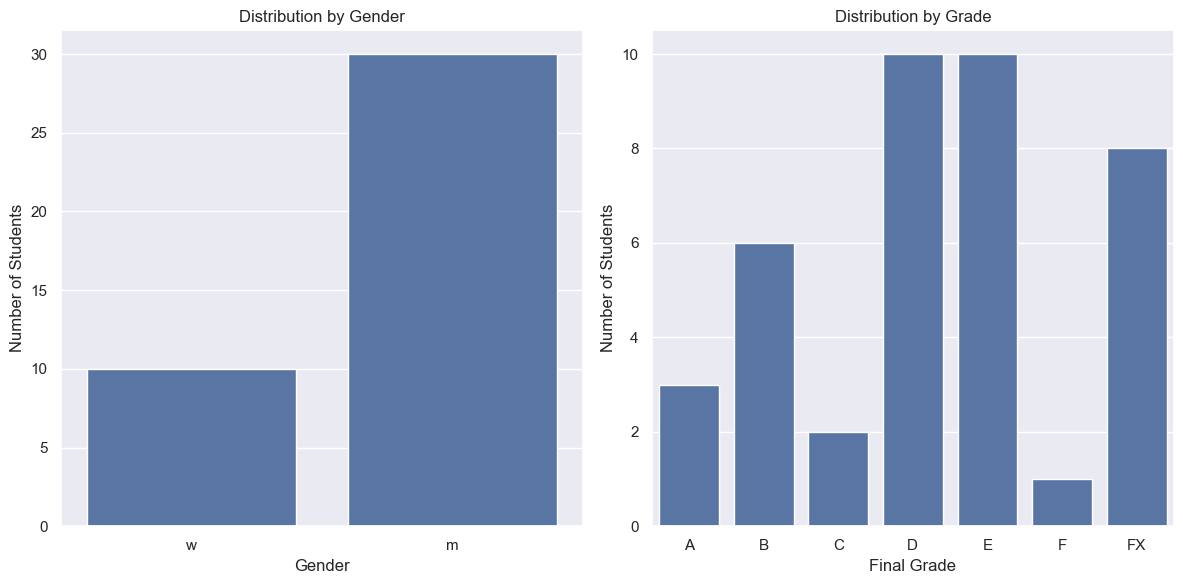

In [12]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for gender
gender_plot = sns.countplot(ax=axes[0], x="Gender", data=data)
gender_plot.set_ylabel("Number of Students")
gender_plot.set_title("Distribution by Gender")

# Bar chart for grades with custom order
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'FX']
grade_plot = sns.countplot(ax=axes[1], x="Final Grade", data=data, order=grade_order)
grade_plot.set_ylabel("Number of Students")
grade_plot.set_title("Distribution by Grade")

# Improve layout
plt.tight_layout()
plt.show()



## Descriptives for numerical variables


In [13]:
data.describe()

,Books,Attendance,Percentage Grade
count,40.00000,40.00000,40.000000
mean,2.00000,14.10000,63.550000
std,1.43223,4.27755,16.705519
min,0.00000,6.00000,37.000000
25%,1.00000,10.00000,51.000000
50%,2.00000,15.00000,60.500000
75%,3.00000,18.25000,73.000000
max,4.00000,20.00000,97.000000


Add some additional statistics

In [14]:
# Additional statistics
variance = data.var(numeric_only=True)
iqr = data.quantile(0.75, numeric_only=True) - data.quantile(0.25, numeric_only=True)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)

# Combine all statistics into one DataFrame
additional_stats = pd.DataFrame({
    'variance': variance,
    'iqr': iqr,
    'range': data_range
})

# Append additional statistics to the describe output
extended_stats = pd.concat([data.describe(), additional_stats.T])
extended_stats


,Books,Attendance,Percentage Grade
count,40.000000,40.000000,40.000000
mean,2.000000,14.100000,63.550000
std,1.432230,4.277550,16.705519
min,0.000000,6.000000,37.000000
25%,1.000000,10.000000,51.000000
50%,2.000000,15.000000,60.500000
75%,3.000000,18.250000,73.000000
max,4.000000,20.000000,97.000000
variance,2.051282,18.297436,279.074359
iqr,2.000000,8.250000,22.000000


#### Outlier detection

In [15]:
# calculate thresholds
extended_stats.loc['lower_bound',] = extended_stats.loc['25%',] - 1.5 * extended_stats.loc['iqr',]
extended_stats.loc['upper_bound',] = extended_stats.loc['75%',] + 1.5 * extended_stats.loc['iqr',]
extended_stats

,Books,Attendance,Percentage Grade
count,40.000000,40.000000,40.000000
mean,2.000000,14.100000,63.550000
std,1.432230,4.277550,16.705519
min,0.000000,6.000000,37.000000
25%,1.000000,10.000000,51.000000
50%,2.000000,15.000000,60.500000
75%,3.000000,18.250000,73.000000
max,4.000000,20.000000,97.000000
variance,2.051282,18.297436,279.074359
iqr,2.000000,8.250000,22.000000


In [16]:
# Extract numerical data
data_num = data.select_dtypes(include='number')

# Create outlier mask
outlier_mask = (data_num < extended_stats.loc['lower_bound']) | (data_num > extended_stats.loc['upper_bound'])
outlier_mask

,Books,Attendance,Percentage Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [17]:
# Optionally: Show outliers
outliers = data_num[outlier_mask].dropna(how='all')
print("Detected outliers:")
print(outliers)

Detected outliers:
Empty DataFrame
Columns: [Books, Attendance, Percentage Grade]
Index: []


No outliers were detected in any of the variables.

### Histograms

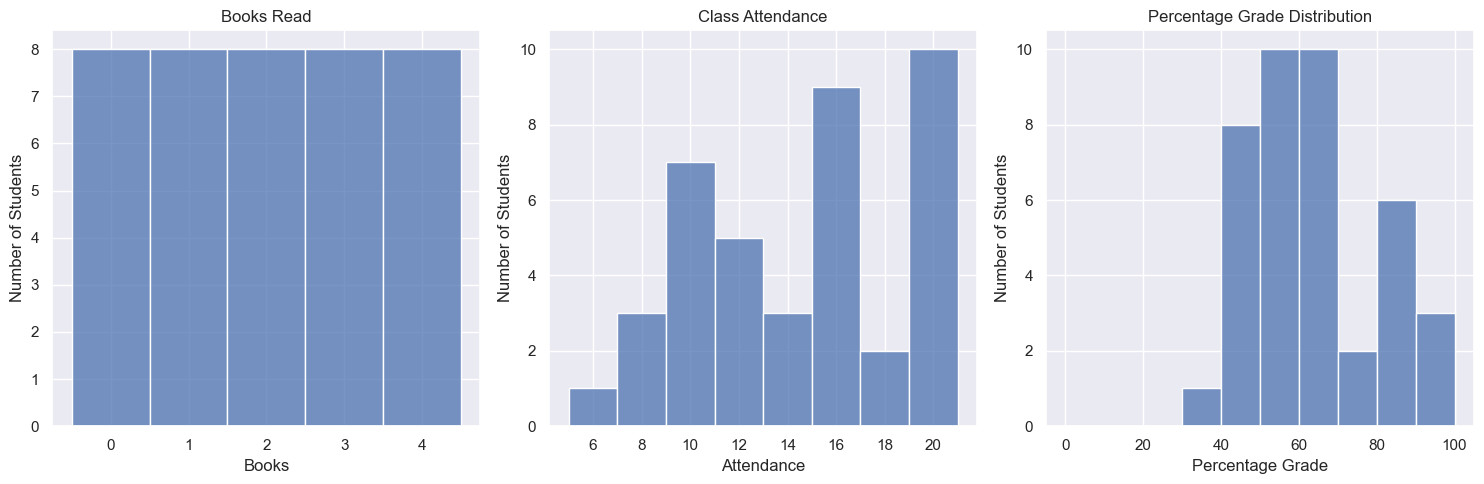

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for number of books
hist1 = sns.histplot(ax=axes[0], x="Books", data=data, bins=5, binrange=(-0.5, 4.5))
hist1.set_ylabel("Number of Students")
hist1.set_title("Books Read")

# Histogram for attendance
hist2 = sns.histplot(ax=axes[1], x="Attendance", data=data, binwidth=2, binrange=(5, 21))
hist2.set_ylabel("Number of Students")
hist2.set_title("Class Attendance")

# Histogram for percentage grade
hist3 = sns.histplot(ax=axes[2], x="Percentage Grade", data=data, binwidth=10, binrange=(0, 100))
hist3.set_ylabel("Number of Students")
hist3.set_title("Percentage Grade Distribution")

# Improve layout
plt.tight_layout()
plt.show()

### Boxplots

<Axes: ylabel='Percentage Grade'>

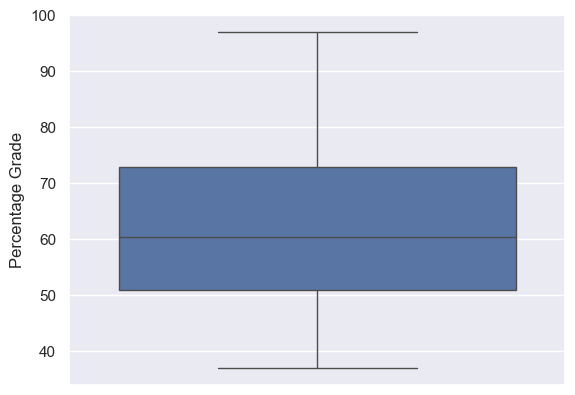

In [19]:
# Box plot of a single variable
sns.boxplot(y="Percentage Grade", data=data)

<Axes: >

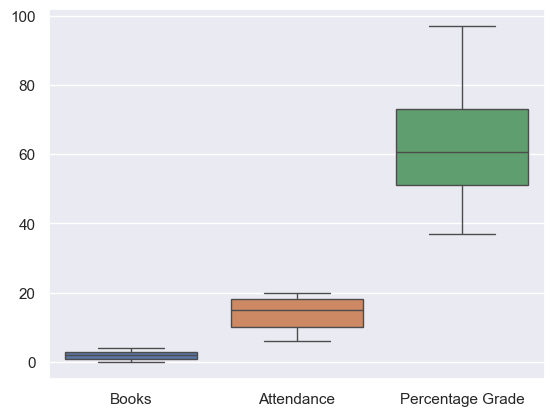

In [20]:
# Box plot of all numerical variables
sns.boxplot(data=data)

# Is it meaningful to display these three variables in the same figure? Why (or why not)?

<Axes: xlabel='Gender', ylabel='Percentage Grade'>

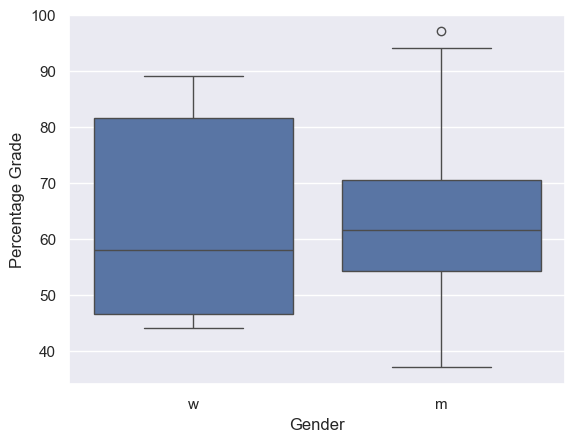

In [21]:
# Box plot of a read books by gender
sns.boxplot(y="Percentage Grade", x="Gender", data=data)

## Scatterplot and correlation

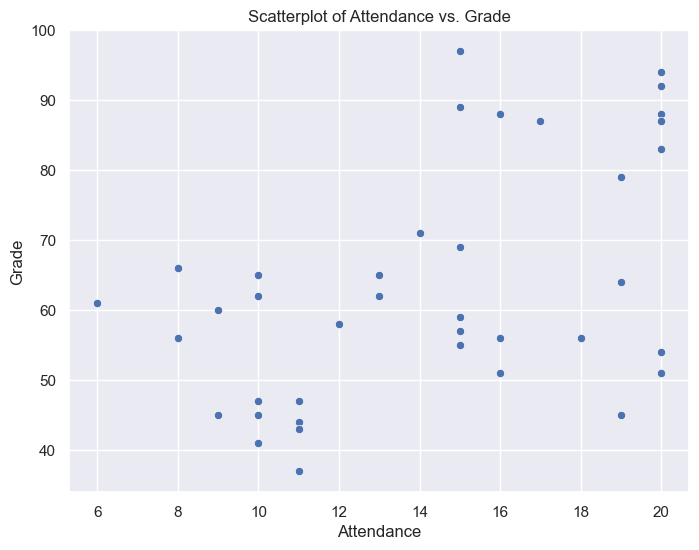

Pearson Correlation Coefficient: 0.482


In [22]:
# extract the columns 'Attendance' and 'Grade' from the dataset
attendance = data['Attendance']
grade = data['Percentage Grade']

# create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=attendance, y=grade)
plt.title('Scatterplot of Attendance vs. Grade')
plt.xlabel('Attendance')
plt.ylabel('Grade')
plt.show()
# calculate Pearson correlation coefficient
pearson_corr, p_value = stats.pearsonr(attendance, grade)
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
